# Encontrar las Farmacia de Guardia mas cercana en Madrid

#### Explicación de la Práctica

En primer lugar se obtienen los datos, los cuales han sido obtenidos desde una base de datos open source del ayuntamineto de Madrid. Una vez ya se han extraido lo datos en csv, se importan a python y se puede empezar a trabajar con ellos. 
El primer paso, es añadir a los datos dos nuevas columnas ( Latitud y Longitud ) para asi poder tener las farmacias localizadas. Para poder acceder a la localizacion en latitud y longitud, se ha utilizado los datos obtenidos de la API OpenCage Geocoder y se ha utilizado la ecuaciuon de Haversine para el calculo de la distancia entre el usuario y la farmacia, pudiendo asi calcular la distancia mas corta entre el uduario y las farmacias de guardia. 
Por otro lado hay que ver el dia y la hora en la que se realiza la consulta de la farmacia ya que segun cuando se realice el resultado variara, ya que algunas farmacias no abren todos los días, y otras no tiene servicio 24h.

In [1]:
#Importación de los datos en csv
#La columna de GoogleMaps se ha decidido introducir manuealmete ya que la direccion original, da bastante error al ubicarlo
import pandas as pd
farmacias = pd.read_csv('turnosmadrid_guardia_2021.csv',delimiter=";",encoding='latin-1') 
farmacias

,Localidad,Barrio,Fecha,Farmacia,Direccion,Duración,Teléfono,GoogleMaps
0,Madrid,BARAJAS-ALAMEDA DE OSUNA,01/01/2021,19,"AV GENERAL, 1 (BARAJAS)",SERVICIO DIURNO (DE 9'30 A 23'00),913054120,"Av. General, 1, 28042 Madrid"
1,Madrid,CENTRO,01/01/2021,46,"PZ DEL ANGEL, 14 (Entre Pz Benavente y Santa ...",SERVICIO 24 HORAS (DE 9'30 A 9'30),913692318,"Plaza del Ángel, 14, 28012 Madrid"
2,Madrid,CHAMBERI-MONCLOA,01/01/2021,55,"CL FERRAZ, 13",SERVICIO DIURNO (DE 9'30 A 23'00),915470572,"Calle de Ferraz, 13, 28008 Madrid"
3,Madrid,CHAMARTIN-HORTALEZA,01/01/2021,95,"AV MACHUPICHU, 37 LC 2 Y 3",SERVICIO 24 HORAS (DE 9'30 A 9'30),913887588,"Av. de Machupichu, 37, 28043 Madrid"
4,Madrid,CENTRO,01/01/2021,102,"PZ PUERTA DEL SOL, 14",SERVICIO DIURNO (DE 9'30 A 23'00),915312514,"Puerta del Sol, 14, 28013 Madrid"
...,...,...,...,...,...,...,...,...
8851,Madrid,FUENCARRAL-BARRIO DEL PILAR,30/04/2021,2314,"CL MONASTERIO MONTESCLAROS, 7-B C/V A MO. ESCO...",SERVICIO DIURNO (DE 9'30 A 23'00),914275329,"Calle Monasterio de Montesclaros, 7, 28049 Madrid"
8852,Madrid,RETIRO-ARGANZUELA,30/04/2021,2336,"PS SANTA MARIA DE LA CABEZA, 64 LC II",SERVICIO DIURNO (DE 9'30 A 23'00),914730672,"Paseo de Santa María de la Cabeza, 64, 28045 M..."
8853,Madrid,RETIRO-ARGANZUELA,30/04/2021,2360,"PS DELICIAS, 5 (Altura 41 Ps Yeserias)",SERVICIO 24 HORAS (DE 9'30 A 9'30),914740702,"Paseo de las Delicias, 5, 28045 Madrid"
8854,Madrid,BARAJAS-ALAMEDA DE OSUNA,30/04/2021,2514,AEROPUERTO BARAJAS TERMINAL 1 LLEGADAS SALA 2,SERVICIO DE 7'00 A 23'00 HORAS,913055203,"T1 Aeropuerto Barajas, 28042 Madrid"


Aquí ya se empiezan a filtrar los datos, y se añaden las columnas de latitud y longitud a través de la API. Se aprecian en el codigo que se han modificado la localización de ciertos valores.
Esto se debe a que la dirección que hay en la tabla, la API no las detecta correctamente y te devuelve error o una localización diferente a la que realmente es, por lo tanto, se ha obtado por introducir la dirección a mano de tal manera que la API localice la direccion sin problemas

In [2]:
import urllib.request
import json
#usamos la API OpenCage Geocoder

farmacia_id=[] #Almacena los id de cada Farmacia
key='9f744e94b4f34ade9e8db4d9b0695135'
lat=[] # Almacena las latitudes
lng=[] # Almacena las longitudes
for index, row in farmacias.iterrows():
    if farmacias.Farmacia[index] in farmacia_id:
        #si el id de farmacia coincide es que ya lo hemos calculado por lo tanto no habria que volver a llamar a la API
        pass
    else:
        farmacia_id.append(farmacias.Farmacia[index]) #se van almacenando los id de las farmacias
        localizacion=farmacias.GoogleMaps[index]
        try:
            #Llamada a la API OpenCage Geocoder
            url = 'https://api.opencagedata.com/geocode/v1/json?q='+urllib.parse.quote(localizacion)+'&key='+key+'&language=es&pretty=1'
            
            #Lectura de los datos obtenidos en la API
            data = urllib.request.urlopen(url).read().decode()
            
            #Transformacion de JSON de phyton para su extraccion.
            js = json.loads(data)
            lat.append(js['results'][0]['geometry']['lat'])
            lng.append(js['results'][0]['geometry']['lng'])
            
        except IndexError:
            #en caso de que exista una localizacion que no pueda reconocer
            print("Localizaion erronea:",localizacion,"Posicion", index)

In [3]:
#Número de farmacias que no se han repetido
#Se ha calculado la localización de cada una de las farmacias existentes en la tabla, para asi optimizar las llamasdas a la API
print(len(farmacia_id))
print(farmacia_id)

117
[19, 46, 55, 95, 102, 119, 123, 124, 126, 136, 139, 187, 238, 279, 286, 287, 289, 331, 333, 350, 367, 408, 412, 493, 509, 515, 524, 525, 535, 551, 598, 601, 624, 641, 649, 657, 677, 706, 743, 751, 792, 841, 886, 892, 913, 931, 967, 968, 999, 1077, 1088, 1095, 1102, 1198, 1248, 1274, 1289, 1295, 1301, 1346, 1358, 1371, 1408, 1451, 1454, 1455, 1473, 1533, 1566, 1764, 1870, 1890, 1915, 2128, 2274, 2314, 2336, 2360, 2514, 2619, 86, 1432, 2612, 1412, 159, 1867, 133, 937, 1964, 2605, 107, 2001, 546, 1188, 1437, 606, 911, 984, 1240, 18, 895, 498, 1063, 1917, 2195, 93, 1329, 109, 1682, 1741, 1801, 1749, 753, 2293, 2089, 374, 1678]


El siguijnete paso en introducir la Latitud y la Longitud paras cada una de la Farmacias, para ellos debemos de fijarnos en el identificador (Farmacias en la tabla) para introducir la localizacion correcta.
El numero de identificacion y de latitud y longitud en sus repestivas listas es el mismo por lo tanto hay quer jugar con dicho índice.
Por último, se añade a la tabla las dos columnas ya creadas.

In [4]:
latitud=[] # Almacena en el mismo orden que la tabla, las latitudes de todas las farmacias
longitud=[] # Almacena en el mismo orden que la tabla, las longitudes de todas las farmacias
for j in range(len(farmacias)):
    ident = farmacias.Farmacia[j]  #Localiza el Identificador de cada Farmacia
    posicion=farmacia_id.index(ident)  #Localiza el indice en el que se encuentra el identificador
    latitud.append(lat[posicion])  #accede al índice donde se encuentra la Latitud referente al identificador de farmacia
    longitud.append(lng[posicion]) #accede al índice donde se encuentra la Longitud referente al identificador de farmacia

In [5]:
#Añadimos la dos columnas a la tabla
farmacias['Latitud']=latitud
farmacias['Longitud']=longitud
farmacias

,Localidad,Barrio,Fecha,Farmacia,Direccion,Duración,Teléfono,GoogleMaps,Latitud,Longitud
0,Madrid,BARAJAS-ALAMEDA DE OSUNA,01/01/2021,19,"AV GENERAL, 1 (BARAJAS)",SERVICIO DIURNO (DE 9'30 A 23'00),913054120,"Av. General, 1, 28042 Madrid",40.473277,-3.577829
1,Madrid,CENTRO,01/01/2021,46,"PZ DEL ANGEL, 14 (Entre Pz Benavente y Santa ...",SERVICIO 24 HORAS (DE 9'30 A 9'30),913692318,"Plaza del Ángel, 14, 28012 Madrid",40.414355,-3.702558
2,Madrid,CHAMBERI-MONCLOA,01/01/2021,55,"CL FERRAZ, 13",SERVICIO DIURNO (DE 9'30 A 23'00),915470572,"Calle de Ferraz, 13, 28008 Madrid",40.426591,-3.717877
3,Madrid,CHAMARTIN-HORTALEZA,01/01/2021,95,"AV MACHUPICHU, 37 LC 2 Y 3",SERVICIO 24 HORAS (DE 9'30 A 9'30),913887588,"Av. de Machupichu, 37, 28043 Madrid",40.459471,-3.627540
4,Madrid,CENTRO,01/01/2021,102,"PZ PUERTA DEL SOL, 14",SERVICIO DIURNO (DE 9'30 A 23'00),915312514,"Puerta del Sol, 14, 28013 Madrid",40.417203,-3.702528
...,...,...,...,...,...,...,...,...,...,...
8851,Madrid,FUENCARRAL-BARRIO DEL PILAR,30/04/2021,2314,"CL MONASTERIO MONTESCLAROS, 7-B C/V A MO. ESCO...",SERVICIO DIURNO (DE 9'30 A 23'00),914275329,"Calle Monasterio de Montesclaros, 7, 28049 Madrid",40.416500,-3.702600
8852,Madrid,RETIRO-ARGANZUELA,30/04/2021,2336,"PS SANTA MARIA DE LA CABEZA, 64 LC II",SERVICIO DIURNO (DE 9'30 A 23'00),914730672,"Paseo de Santa María de la Cabeza, 64, 28045 M...",40.400476,-3.699988
8853,Madrid,RETIRO-ARGANZUELA,30/04/2021,2360,"PS DELICIAS, 5 (Altura 41 Ps Yeserias)",SERVICIO 24 HORAS (DE 9'30 A 9'30),914740702,"Paseo de las Delicias, 5, 28045 Madrid",40.406594,-3.693111
8854,Madrid,BARAJAS-ALAMEDA DE OSUNA,30/04/2021,2514,AEROPUERTO BARAJAS TERMINAL 1 LLEGADAS SALA 2,SERVICIO DE 7'00 A 23'00 HORAS,913055203,"T1 Aeropuerto Barajas, 28042 Madrid",40.467885,-3.571765


Se obtiene el valor de el dia y la hora donde, en el momento que se va arealizar la consulta

In [6]:
import datetime

hoy=datetime.date.today().strftime('%d/%m/%Y')#la tabla farmacias esta ordenada como dia/mes/año
print(hoy)

hora=datetime.datetime.now().strftime('%H:%M:%S') #calcular la hora para comprobar que la farmacia esta abierta o cerrada
print(hora)

11/02/2021
13:14:59


Por ultimo, se obtiene la localizacion del ususario y se realiza la consulta de que farmacia es la más cercana, previamente haciendo un filtro del dia en el que no encontramos.
Cuando se calculan ambas latitudes, se utiliza la ecuacion de Haversine para calcula la distancia entre un punto A y un punto B. Luego, se ha filtrado por hora para ver en que estado se encunetra la farmacias si abierta o cerrada.
A continuación, se muestra un ejemplo de como introducir la direccion del usuario:
    
    Ej: Av Gregorio del Amo, 6, 28024, Madrid
    
Para poder utilizar la ecuacion de Haversine hay que instalarse la libreria desde la cual podemos utilizarlo directamente sin tener que poner su ecuacion a mano, para ello debemos poner el sieguiente comando en el prompt

    >pip install haversine

In [7]:
localizacion = input("Introduzca tu ubicación actual: ")

#Llamada a la Api de OpenCage Geocoder para calcular la posicion del usuario
key='9f744e94b4f34ade9e8db4d9b0695135'
url = 'https://api.opencagedata.com/geocode/v1/json?q='+urllib.parse.quote(localizacion)+'&key='+key+'&language=es&pretty=1'

#Lectura de los datos obtenidos en la API
data = urllib.request.urlopen(url).read().decode()

#Transformacion de JSON de phyton para su extraccion.
js = json.loads(data)
lat_usuario = js['results'][0]['geometry']['lat']
print(lat_usuario)
lng_usuario = js['results'][0]['geometry']['lng']
print(lng_usuario)

Introduzca tu ubicación actual: A. Gregorio del Amo, 6, Madrid
40.42526
-3.69063


In [8]:
#!pip install haversine

In [9]:
from haversine import haversine, Unit #importacion de la ecuacion de haversine
#pip install haversine

usuario = (lat_usuario, lng_usuario) # (lat, lon) del usuario al introducir donde se encuentra
max=500 #distancia inicial de 500km
mylist=[] #almacena la direccion de las farmacias cercanas
mydistancia=[] #alamcena la distancia de las farmacias
localizador=[] #guarda la posicion en la que se encuentran dichas farmacias
horario=[] #guardia el horario de las farmacias
mapa_latitud=[] #guarda la latitud de las farmacias
mapa_longitud=[] #guarda la longitud de las farmacias

for index, row in farmacias.iterrows():
    if row['Fecha'] == hoy: #Filtramos por el dia en el que nos encontramos
        Destino = (farmacias.Latitud[index], farmacias.Longitud[index]) # (lat, lon) de cada una de las farmacias
        distancia=haversine(usuario, Destino) #calculo de la distancia entre el usuario y cada una de las farmacias
        mapa_latitud.append(farmacias.Latitud[index])
        mapa_longitud.append(farmacias.Longitud[index])
        
        if distancia <= max and farmacias.Direccion[index] not in mylist: #condicional de que las distancias sean menor que el valor asignado y que la diatancia ya no este calculada
            if distancia!=0:
                mydistancia.append(distancia) # Guardamos en mylist los resultados de las distancias obtenidas
                mylist.append(farmacias.Direccion[index]) #Guardamos en el mismo orden que las diatncias las direcciones de las Farmacias
                max=distancia # Actualizacion de cada vez que la diatncia sea menor que la anteriuor registrada
                horario.append(farmacias.Duración[index])
                localizador.append(index) # Se van guardando los indices de cada farmacias para poder obtener otro parametros
                
            else:
                print("Se encuentra delante de una Farmacia de Guardia")
                print(farmacias.Direccion[index])
        else:
            pass
    else:
        pass
        

In [10]:
import time
hora_actual=time.localtime()
kk=2 #distancia maxima de 2 km
cercana=[] #alamcena las farmacias que cumplen el requisito que estan a menos de 2 km
localizador_farma=[] #almacena el indice de las farmacias
horario_cercana=[] #almacena el horario de las farmacias cercanas
estado=[] #almacena los requisitos de la hora de las Farmacias, (ABIERTA O CERRADO)
lejania=[] #distancia de las farmacias cercanas

for u in range(len(mydistancia)):
    if kk >= mydistancia[u]:
        lejania.append(mydistancia[u])
        cercana.append(mylist[u])
        localizador_farma.append(localizador[u])
        horario_cercana.append(horario[u])
        if ((hora_actual.tm_hour >= 21) & (hora_actual.tm_min >= 30)) & horario[u].endswith("21'30)"):
            estado.append("CERRADA")
        elif ((hora_actual.tm_hour >= 22) & (hora_actual.tm_min >= 59)) & horario[u].endswith("23'00)"):
            estado.append("CERRADA")
        else:
            estado.append("ABIERTA")

In [11]:
FarmaciasCercanas = pd.DataFrame(estado,columns = ["Estado"])
FarmaciasCercanas["Direccion"] = cercana
FarmaciasCercanas["Horario"] = horario_cercana
FarmaciasCercanas["Distancia (km)"] = lejania#round(kk*1000)

print(f"Hay {len(cercana)} farmacias cerca de usted")

FarmaciasCercanas.iloc[::-1] #inveritr la tabla de mas cercana o mas lejana

Hay 3 farmacias cerca de usted


,Estado,Direccion,Horario,Distancia (km)
2,ABIERTA,"CL VELAZQUEZ, 70",SERVICIO DIURNO (DE 9'30 A 23'00),0.712281
1,ABIERTA,"CL NARVAEZ, 3 (Esquina a Goya)",SERVICIO DIURNO (DE 9'30 A 23'00),1.282266
0,ABIERTA,"PZ DEL ANGEL, 14 (Entre Pz Benavente y Santa ...",SERVICIO 24 HORAS (DE 9'30 A 9'30),1.577994


En esta parte se ha querido representar de manera aproximada la distancia a la que se encuentran las farmacias. para ello se ha importado una imagen de la ciudad de madrid y encima se ha colocado de manera aporoximada la ubicación de las farmacias con puntos azules. 
A su vez, la ubicacion del usuario se presenseta con un punto rojo y al rededor un campoo de actuación de aproximadamente unos 2 km

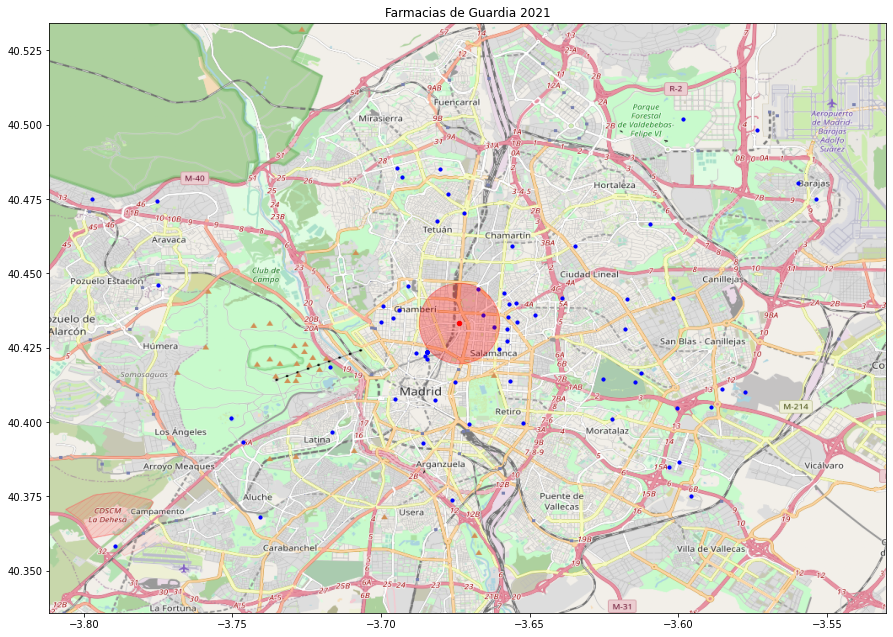

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

BBox=(-3.8116, -3.5300, 40.3358, 40.5344)
ruh_m = plt.imread('mapaMadrid.png')

fig, ax = plt.subplots(figsize = (15,15))

for punto in range(len(mapa_latitud)):
    ax.scatter((mapa_longitud[punto]+0.018), (mapa_latitud[punto]+0.007), c='b', s=10)
    
ax.set_title('Farmacias de Guardia 2021')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.scatter((lng_usuario+0.017), (lat_usuario+0.008), c='r', s=20)
ax.scatter((lng_usuario+0.017), (lat_usuario+0.008), c='r', s=6500, alpha=0.3)
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')